<a href="https://colab.research.google.com/github/Adj95/python_dsc/blob/main/MNIST_Dataset_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST DATA PCA example **

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv("/content/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20792,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


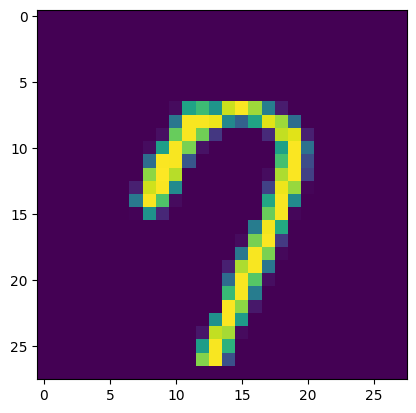

In [11]:
plt.imshow(df.iloc[29136 , 1:].values.reshape(28,28))

In [31]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]


using non pca

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [20]:
import time
start = time.time()
ypred = knn.predict(x_test)
end = time.time()
print(end - start)

12.182563543319702


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , ypred)

0.9648809523809524

using pca

In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=400)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [36]:
x_train_trf.shape

(33600, 100)

In [51]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf , y_train)

KNeighborsClassifier()

In [52]:
ypred1 = knn.predict(x_test_trf)

In [53]:
accuracy_score(y_test , ypred1)

0.9661904761904762

In [ ]:
for i in range(1 ,785):
  pca = PCA(n_components=i)
  x_train_trf = pca.fit_transform(x_train)
  x_test_trf = pca.transform(x_test)

  knn = KNeighborsClassifier()
  knn.fit(x_train_trf , y_train)

  ypred1 = knn.predict(x_test_trf)

  print(i , accuracy_score(y_test , ypred1))

plotting in 3d

In [54]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


In [55]:
import plotly.express as px
y_train_trf  = y_train.astype(str)
fig = px.scatter_3d (df , x = x_train_trf[: , 0] , y = x_train_trf[: , 1]  , z = x_train_trf[: , 2] , color = y_train_trf )
fig.update_layout(margin = dict(l = 20 , r = 20 , b = 20 , t = 20))
fig.show()

checking optimum value of variance (crosses 90%)

In [44]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


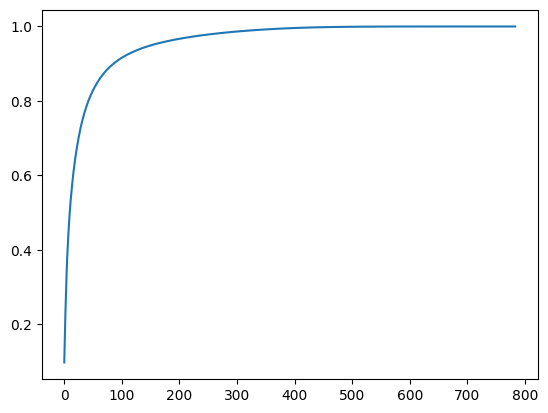

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
